# Exercise Sheet 02: Principal Component Analysis, Factor Analysis, K-Means, and Gaussian Mixture Models

**Introduction to Data Mining WS23/24**  
**Bielefeld University**  
**Alina Deriyeva, Benjamin Paaßen**  
**Exercise Sheet Publication Date: 2023-11-06**  
**Exercise Sheet Submission Deadline: Friday, 2023-11-17, noon (i.e. 12:00), via Moodle.**

**NOTE** The use of language models/AI tools is permitted IF you notify us of the use (just indicate it in the respective task) and are still able to understand and present your results. We also appreciate it if you link to a chatlog of the interaction with the language model/AI tool so that we can understand better how students tend to use these tools.

Vincent Keuch

## Preamble: Data set

The file `sheet02_data.csv` contains fictional data as you might find in an online course. Each row represents a student, each column a feature of the student's activity in the course, namely their number of posts in the course discussion forum, the number of questions they asked in chat during the online lectures, the number of messages they sent to their peers, and the number of points they achieved in each of the five exercises of the course.

Note that there is quite a bit of missing data for later exercises because many students dropped out of the course early.

The following line loads this raw data and prints it.

In [128]:
import numpy as np
import matplotlib.pyplot as plt


features = ['num_forum_postings',
    'num_questions',
    'num_messages',
    'num_completed_tasks',
    'points_exercise_1',
    'points_exercise_2',
    'points_exercise_3',
    'points_exercise_4',
    'points_exercise_5']

Data = np.loadtxt('sheet02_data.csv', skiprows = 1, delimiter = '\t')

### Task 02.01

Our first challenge is to impute the missing data. Fill in missing values with the mean points the respective student got on the other exercises. For students with no completed exercises, fill in zeros.

In [129]:
for student in Data:
    #Calculate mean points for each student
    mean_points = 0
    number_test_taken = 0
    for i in range(4, 9):
        if not np.isnan(student[i]):
            number_test_taken += 1
            mean_points += student[i]
    if number_test_taken != 0:
        mean_points = mean_points / number_test_taken
    #Fill in the mean points for each student
    for i in range(4 + number_test_taken, 9):
        student[i] = mean_points

In [130]:
# this cell is here for test purposes. please ignore it. 

### Task 02.02

Next, normalize the data by dividing by the maximum value in each column.

In [131]:
max_values_column = [0, 0, 0, 0, 0, 0, 0, 0, 0]

#Determining max values of each column
for student in Data:
    for i in range(0, len(student)):
        if max_values_column[i] < student[i]:
            max_values_column[i] = student[i]

#Normelizing
for student in Data:
    for i in range(0, len(student)):
        student[i] = student[i] / max_values_column[i]
        

In [132]:
# this cell is here for test purposes. please ignore it. 

## Principal Component Analysis

### Task 02.03

Compute the covariance matrix of the data via `np.cov` and compute the eigenvalues of the covariance matrix via `np.linalg.eigvals`. Provide a plot of the eigenvalues on the y-axis, sorted according to size (the largest eigenvalue at x=1, the second-largest on x=2, and so on).

Compute and report the percentage of variance covered by the first two eigenvalues.

**HINT:** `np.cov` treats the rows as variables and columns as observations. For our data set, rows are observations and columns are variables.

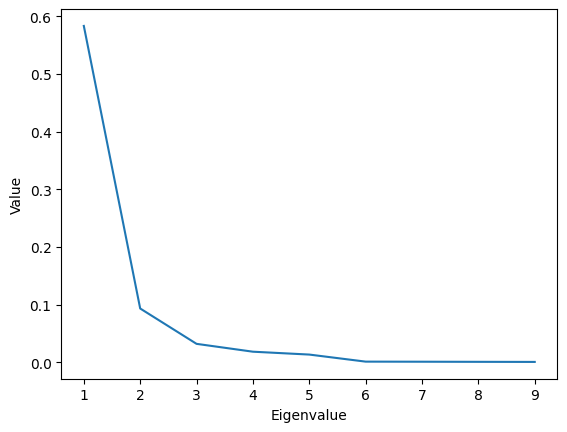

The first two eigenvalues cover 90.89850565655809% of the whole variance


In [133]:
#Calculate covariance matrix and eigenvalues
cov_mat_Data = np.cov(Data, rowvar=False)
eigenvalues = np.linalg.eigvals(cov_mat_Data)

#Plot eigenvalues
plot_x_axis = range(1, len(eigenvalues) + 1) 

plt.plot(plot_x_axis, np.sort(eigenvalues)[::-1])
plt.xlabel('Eigenvalue')
plt.ylabel('Value')
plt.show()

all_variance = np.sum(eigenvalues)
covered_variance = eigenvalues[0] + eigenvalues[1]
percentage_variance_covered = covered_variance / all_variance * 100

print(f'The first two eigenvalues cover {percentage_variance_covered}% of the whole variance')

In [134]:
# this cell is here for test purposes. please ignore it. 

### Task 02.04

Use the `fit` method of a `sklearn.decomposition.PCA` model to perform a principal component analysis of this data with `n_components = 2`.

Transform the data to the latent space via the `transform` function of the PCA model.

Plot the data using a 2D scatter plot.

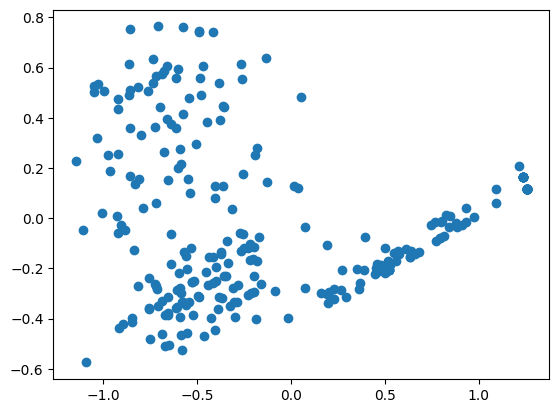

In [135]:
from sklearn.decomposition import PCA

transposed_Data = np.transpose(Data)

pca = PCA(n_components = 2)
pca.fit(Data)

PCA_Data = pca.transform(Data)

pca_plot_x = []
pca_plot_y = []

for point in PCA_Data:
    pca_plot_x.append(point[0])
    pca_plot_y.append(point[1])

plt.scatter(pca_plot_x, pca_plot_y)
plt.show()

In [136]:
# this cell is here for test purposes. please ignore it. 

### Task 02.05 (Bonus Task)

Compute the eigenvalue decomposition of the covariance matrix and perform PCA yourself. Only retain the two most prominent components and plot the transformed data with a 2D scatter plot. Check whether your plot is consistent with the plot above.

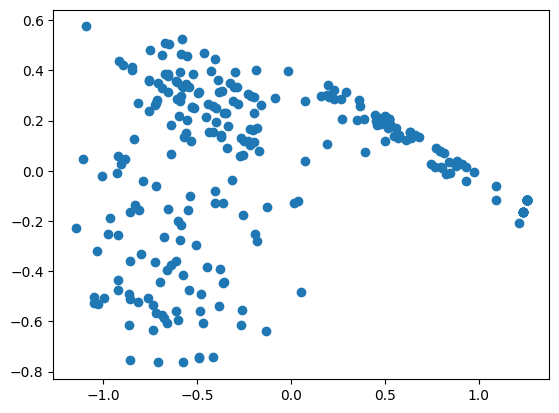

"\nThe plots are consistent in shape and size, though my custom PCA seems to have it's y-Axis multiplied with -1 and I don't know why.\n"

In [137]:
def custom_PCA_transormation(Data, dimensions_left):
    #Calculate mean
    mean = np.full(len(Data[0]), 0.)
    for point in Data:
        mean += point
    mean = mean / len(Data)
    
    #Calculate covariance matrix
    Cov = np.zeros((len(Data[0]), len(Data[0])))
    np.outer((Data[0] - mean), (Data[0] - mean))
    for point in Data:
        Cov += np.outer((point - mean), (point - mean))
    
    Cov = Cov / len(Data)
    
    #Calculate eigenvalue decomposition
    eig_val, eig_vec = np.linalg.eig(Cov)
    
    #Remove Columns with lowest eigenvalues/variance
    sorted_eig_val = np.sort(eig_val)
    to_delete_columns = []
    
    for i in range(0, len(sorted_eig_val) - dimensions_left):
        for j in np.where(eig_val == sorted_eig_val[i]):
            to_delete_columns.append(j)
    
    reduced_eig_vec = np.delete(eig_vec, to_delete_columns, axis=1)
    
    #Transforming the Data
    transformed_Data = []
    for point in Data:
        transformed_Data.append(reduced_eig_vec.T @ (point - mean))
        
    
    return transformed_Data

custom_pca_data = custom_PCA_transormation(Data, 2)
pca_plot_x = []
pca_plot_y = []

for point in custom_pca_data:
    pca_plot_x.append(point[0])
    pca_plot_y.append(point[1])

plt.scatter(pca_plot_x, pca_plot_y)
plt.show()

'''
The plots are consistent in shape and size, though my custom PCA seems to have it's y-Axis multiplied with -1 and I don't know why.
'''

In [138]:
# this cell is here for test purposes. please ignore it. 

## Factor Analysis

### Task 02.06

Use the `fit` method of a `sklearn.decomposition.FactorAnalysis` model to perform a factor analysis of this data with `n_components = 2`. Use the `rotation = 'varimax'` parameter.

Transform the data to the latent space via the `transform` function of the FA model.

Plot the data using a 2D scatter plot.

Compare this plot to the plot above. What difference do you notice?

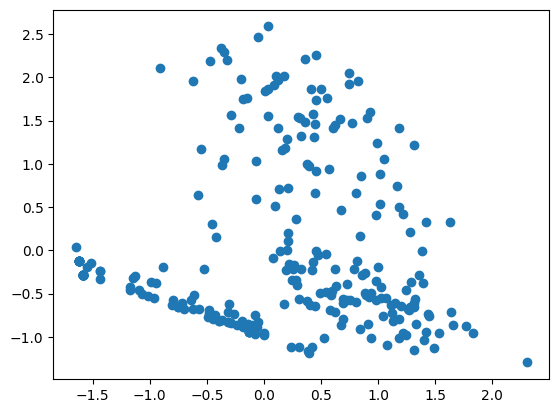

In [139]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2, rotation='varimax')

fa.fit(Data)
FA_Data = fa.transform(Data)

fa_plot_x = []
fa_plot_y = []

for point in FA_Data:
    fa_plot_x.append(point[0])
    fa_plot_y.append(point[1])

plt.scatter(fa_plot_x, fa_plot_y)
plt.show()

In [140]:
# this cell is here for test purposes. please ignore it. 

The most obvious difference I notice is that the plots look kind of mirrored. The diagonal pointing upwards from the bottom looks shorter in the FA plot.
The values are larger in the FA plot compared to the PCA plot. 

### Task 02.07

Print the `components_` property of the factor analysis model. For both factors, report which features/columns of the data have high weights.

Try to interpret the 

Print the factors found by the factor analysis using `print(model.components_)`. Try to interpret both factors. What does the first factor represent? What does the second factor represent?

In [141]:
print(fa.components_)
'''
These two vectors are the principle axes of the ellipse describing the distribution of the original data
'''

[[0.11703187 0.09086351 0.0932999  0.33418737 0.27715195 0.2760629
  0.26329229 0.26347569 0.26832181]
 [0.21847961 0.19309129 0.17895348 0.11021114 0.05045514 0.04984632
  0.04727654 0.0480017  0.05404447]]


'\nThese two vectors are the principle axes of the ellipse describing the distribution of the original data\n'

## Clustering

### Task 02.08

Using `sklearn.cluster.KMeans`, perform cluster analyses of the data for `n_clusters` between 2 and 10. For each value of `n_clusters`, compute the `sklearn.metrics.silhouette_score`. Provide a plot of the silhouette score on the y axis and `n_clusters` on the x axis. Report which value for `n_clusters` is best according to this analysis.

**HINT:** The `silhouette_score` function requires the cluster labels as second argument. You can retrieve the cluster labels from a fitted `KMeans` model via the `predict` function.

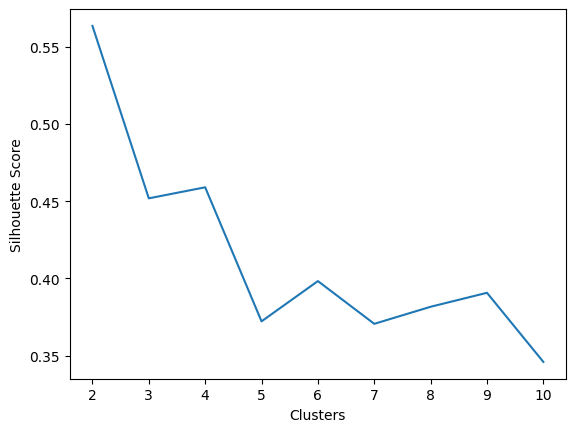

In [142]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
km_plot_x_axis = []

for i in range(2, 11):
    km = KMeans(n_clusters=i, n_init='auto')
    km.fit(Data)
    score = silhouette_score(Data, km.predict(Data))
    silhouette_scores.append(score)
    km_plot_x_axis.append(i)
    
plt.plot(km_plot_x_axis, silhouette_scores)
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [143]:
# this cell is here for test purposes. please ignore it. 

According to the silhouette score, the best number of clusters is 2.

### Task 02.09

Using `sklearn.cluster.KMeans`, perform a cluster analysis of the data with `n_clusters = 2`. Provide a scatter plot of the latent representation of the data according to factor analysis, where the color of each point represents the cluster membership.

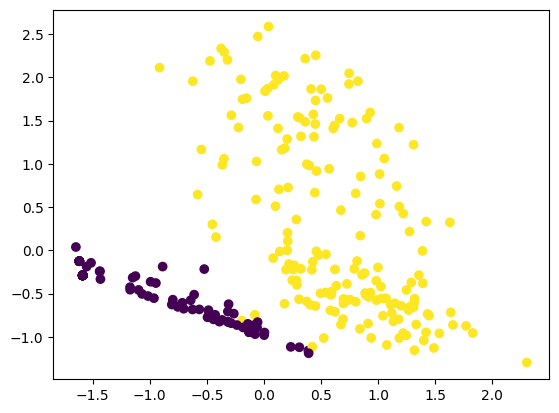

In [144]:
km = KMeans(n_clusters=2, n_init='auto')
km.fit(Data)
colors = km.predict(Data)

plt.scatter(fa_plot_x, fa_plot_y, c=colors)
plt.show()

In [145]:
# this cell is here for test purposes. please ignore it. 

### Task 02.10 (bonus task)

Repeat the cluster analysis, but perform it on the latent representation according to factor analysis. Plot the new clustering. Check if it is consistent with the plot above.


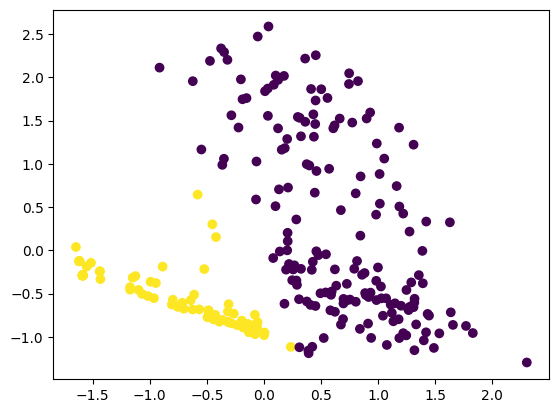

'\nIn the latent data the middle part now counts to the lower part instead of the upper part\n'

In [146]:
km = KMeans(n_clusters=2, n_init='auto')
km.fit(FA_Data)
colors = km.predict(FA_Data)

plt.scatter(fa_plot_x, fa_plot_y, c=colors)
plt.show()

'''
In the latent data the middle part now counts to the lower part instead of the upper part
'''

In [147]:
# this cell is here for test purposes. please ignore it. 

### Task 02.11 (bonus task)

Implement $K$-Means yourself. Check if your result is consistent with the result provided by the `sklearn` implementation.


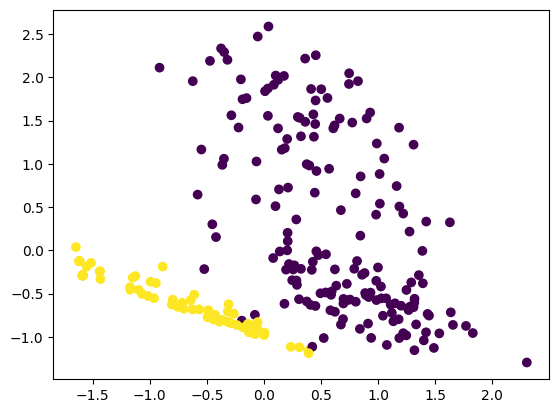

In [148]:
def costum_KM(Data, n_clusters):
    #Initilize the \mu_k
    mean = np.full(len(Data[0]), 0.)
    for point in Data:
        mean += point
    mean = mean / len(Data)
        
    offset = np.mean(mean)
    
    random_offsets = np.random.uniform(low=-offset, high=offset, size=(n_clusters, mean.shape[0]))
    cluster_means = mean + random_offsets
    
    
    #Fit loop
    current_cluster = np.full(len(Data), 0)
    last_changed = True
    
    while last_changed:
        #Calculate current cluster
        last_changed = False
        new_cluster = []
        for point in Data:
            min_distance = 10000000000000000000000000000.
            cluster = 0
            for i in range(0, len(cluster_means)):
                if (np.linalg.norm(point - cluster_means[i])) < min_distance:
                    cluster = i
                    min_distance = np.linalg.norm(point - cluster_means[i])
            new_cluster.append(cluster)
        if not np.array_equal(new_cluster, current_cluster):
            last_changed = True
            current_cluster = new_cluster
        
        
        #Change cluster means position
        new_cluster_means = np.zeros((len(cluster_means), len(cluster_means[0])))
        number_points_cluster = np.full(len(cluster_means), 0)
        
        for i in range(0, len(current_cluster)):
            new_cluster_means[current_cluster[i]] += Data[i]
            number_points_cluster[current_cluster[i]] += 1
            
        for i in range(0, len(new_cluster_means)):
            cluster_means[i] = new_cluster_means[i] / number_points_cluster[i]
            
    return current_cluster


        
colors = costum_KM(Data, 2)

plt.scatter(fa_plot_x, fa_plot_y, c=colors)
plt.show()

## Gaussian Mixture Models

### Task 02.12

Using `sklearn.mixture.GaussianMixture`, perform cluster analyses of the data with `n_components` between 2 and 10. For each cluster analysis, compute the `bic` function value of the model (this is the Bayesian information criterion). Provide a plot of the bic value on the y axis with `n_components` on the x axis.

Report which value for `n_components` is best according to this analysis.

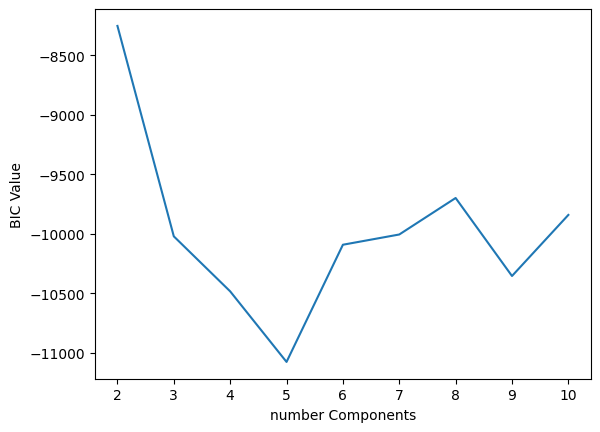

"\nIt does decline, as it should, but these these BIC values seem very wrong and I don't know where I made a mistake.\n"

In [149]:
from sklearn.mixture import GaussianMixture

gm_plot_x_axis = []
gm_plot_y_axis = []

for i in range(2, 11):
    gm = GaussianMixture(n_components=i)
    gm.fit(Data)
    gm_plot_x_axis.append(i)
    gm_plot_y_axis.append(gm.bic(Data))
    
plt.plot(gm_plot_x_axis, gm_plot_y_axis)
plt.xlabel('number Components')
plt.ylabel('BIC Value')
plt.show()

'''
It does decline, as it should, but these these BIC values seem very wrong and I don't know where I made a mistake.
'''

In [150]:
# this cell is here for test purposes. please ignore it. 

### Task 02.13

Using `sklearn.mixture.GaussianMixture`, perform a cluster analysis of the data with `n_components = 2`. Provide a scatter plot of the latent representation of the data according to factor analysis, where the color of each point represents the cluster membership.

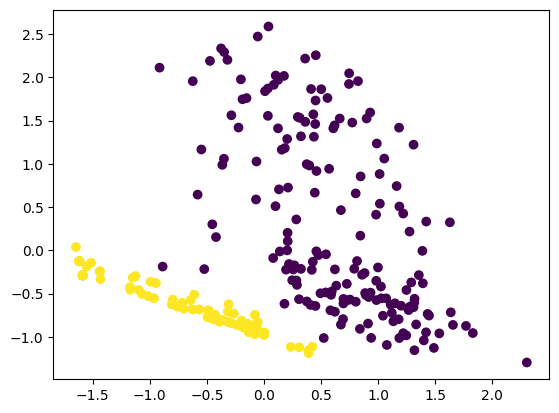

In [156]:
gm = GaussianMixture(n_components=2)
gm.fit(FA_Data)
colors = gm.predict(FA_Data)

plt.scatter(fa_plot_x, fa_plot_y, c=colors)
plt.show()

In [152]:
# this cell is here for test purposes. please ignore it. 

### Task 02.14

Using `sklearn.mixture.GaussianMixture`, perform a cluster analysis of the latent space representation according to factor analysis with `n_components = 3`. Provide a scatter plot, where the color of each point represents the cluster membership.

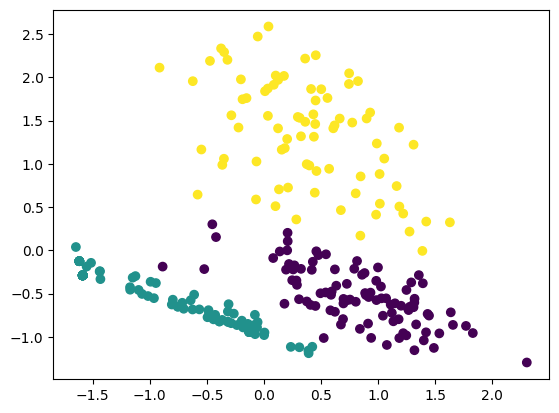

In [153]:
gm = GaussianMixture(n_components=3)
gm.fit(FA_Data)
colors = gm.predict(FA_Data)

plt.scatter(fa_plot_x, fa_plot_y, c=colors)
plt.show()

In [154]:
# this cell is here for test purposes. please ignore it. 

### Task 02.15

Print the mean feature values for each cluster. Try to interpret the clusters: What are the mean differences between the clusters? How would you name each cluster?

In [155]:
print(gm.means_)
'''
The cluster on the bottom probably is the cluster of student who did no exercise/didn't engage with the course at all.
The top one could be those that did engage and scored well on the test.
The middle one could be those who at least tried to engage and scored ok on the tests
'''

[[ 0.81362    -0.52530927]
 [-0.99626264 -0.5008604 ]
 [ 0.38986461  1.31560356]]


"\nThe cluster on the bottom probably is the cluster of student who did no exercise/didn't engage with the course at all.\nThe top one could be those that did engage and scored well on the test.\nThe middle one could be those who at least tried to engage and scored ok on the tests\n"

YOUR ANSWER HERE

### Task 02.16

Recall the equation for the expected negative log likelihood in a Gaussian mixture model from the lecture:

\begin{align*}
Q = &\sum_{i=1}^N \sum_{k=1}^K -\gamma_{k,i} \log\Big[ p_{X|Z}(x_i|k) \cdot p_Z(k) \Big]\\
=& \sum_{i=1}^N \sum_{k=1}^K \gamma_{k,i} \Big(\frac{1}{2}\log[2\pi \det(\Sigma_k)] + \frac{1}{2} (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k) - \log[p_Z(k)]\Big)
\end{align*}

Assuming that $Q$ is convex, find the optimal values for $\mu_k$ and $\Sigma_k$

**HINT:** You may use the following general matrix/vector gradient equations (refer to the [matrix cook book by Peterson and Pedersen (2012), p.10-11](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf) :
\begin{align*}
\nabla_x (x - y)^T W (x - y) &= 2 W (x-y) \\
\nabla_W (x - y)^T W (x - y) &= (x-y)(x-y)^T \\
\nabla_{W^{-1}} \log[\det(W)] &= -W & \text{if $W$ is symmetric and positive semi-definite}
\end{align*}

I looked up how to do the calculations since I didn't realize I could drop a sum thanks to the derivation source(https://see.stanford.edu/materials/aimlcs229/cs229-notes8.pdf)

Since we have given that this functionis convex, we can simply calculate the first derivative to find it's minima. 
\begin{gather*}
\nabla_{\mu_k} \sum_{i=1}^N \sum_{k=1}^K \gamma_{k,i} \left(\frac{1}{2}\log[2\pi \det(\Sigma_k)] + \frac{1}{2} (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k) - \log[p_Z(k)]\right) \stackrel{!}{=} \vec{0}\\
\Leftrightarrow \sum_{i=1}^N \gamma_{k,i} \left( \nabla_{\mu_k} \frac{1}{2} (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k) \right) = 0\\
\Leftrightarrow \sum_{i=1}^N \gamma_{k,i} \left( \Sigma^{-1}_k (x_i - \mu_k) \right) = 0\\
\Leftrightarrow \sum_{i=1}^N \gamma_{k,i} \left( \Sigma^{-1}_k x_i - \Sigma^{-1}_k \mu_k \right) = 0\\
\Leftrightarrow \sum_{i=1}^N \gamma_{k,i} \Sigma^{-1}_k x_i = \sum_{i=1}^N  \gamma_{k,i} \Sigma^{-1}_k \mu_k\\
\Leftrightarrow \Sigma_k^{-1} \sum_{i=1}^N \gamma_{k,i} x_i = \Sigma_k^{-1} \mu_k \sum_{i=1}^N \gamma_{k,i}\\
\Leftrightarrow \frac{\sum_{i=1}^N \gamma_{k,i} x_i}{\sum_{i=1}^N \gamma_{k,i}} = \mu_k
\end{gather*}
Same for $\Sigma_k$
\begin{gather*}
\nabla_{\Sigma_k^{-1}} \sum_{i=1}^N \sum_{k=1}^K \gamma_{k,i} \left(\frac{1}{2}\log[2\pi \det(\Sigma_k)] + \frac{1}{2} (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k) - \log[p_Z(k)]\right) \stackrel{!}{=} \vec{0}\\
\Leftrightarrow\sum_{i=1}^N  \gamma_{k,i} \left(-\frac{1}{2}\Sigma_k + \frac{1}{2} (x_i - \mu_k)^T (x_i - \mu_k)\right) = 0\\
\Leftarrow\sum_{i=1}^N  \gamma_{k,i} \Sigma_k = \sum_{i=1}^N  \gamma_{k,i} (x_i - \mu_k)^{T} (x_i - \mu_k)\\
\Leftrightarrow \Sigma_k \sum_{i=1}^N  \gamma_{k,i} = \sum_{i=1}^N  \gamma_{k,i} (x_i - \mu_k)^{T} (x_i - \mu_k)\\
\Leftrightarrow \Sigma_k = \frac{\sum_{i=1}^N  \gamma_{k,i} (x_i - \mu_k)^{T} (x_i - \mu_k)}{\sum_{i=1}^N  \gamma_{k,i}}
\end{gather*}